---

## Get data in...

In [36]:
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize

def get_json(file_path):
    r = requests.get('https://fantasy.premierleague.com/api/bootstrap-static/')
    jsonResponse = r.json()
    with open(file_path, 'w') as outfile:
        json.dump(jsonResponse, outfile)
        
get_json('/Users/helenalexandrablythe/Football/test2.json')

with open('/Users/helenalexandrablythe/Football/test2.json') as json_data:
    d = json.load(json_data)
    print(list(d.keys()))

    df = json_normalize(d['elements'])
print ('Columns: \n', list(df), '\n')
print ('Dataframe Head: \n', df.head())

['events', 'game_settings', 'phases', 'teams', 'total_players', 'elements', 'element_stats', 'element_types']
Columns: 
 ['chance_of_playing_next_round', 'chance_of_playing_this_round', 'code', 'cost_change_event', 'cost_change_event_fall', 'cost_change_start', 'cost_change_start_fall', 'dreamteam_count', 'element_type', 'ep_next', 'ep_this', 'event_points', 'first_name', 'form', 'id', 'in_dreamteam', 'news', 'news_added', 'now_cost', 'photo', 'points_per_game', 'second_name', 'selected_by_percent', 'special', 'squad_number', 'status', 'team', 'team_code', 'total_points', 'transfers_in', 'transfers_in_event', 'transfers_out', 'transfers_out_event', 'value_form', 'value_season', 'web_name', 'minutes', 'goals_scored', 'assists', 'clean_sheets', 'goals_conceded', 'own_goals', 'penalties_saved', 'penalties_missed', 'yellow_cards', 'red_cards', 'saves', 'bonus', 'bps', 'influence', 'creativity', 'threat', 'ict_index'] 

Dataframe Head: 
    chance_of_playing_next_round  chance_of_playing_th

---

### Get rid of unused columns & rename useful ones:

In [37]:
df = df.drop(['assists','element_type','saves','team_code','code','web_name','special','red_cards','id','photo','clean_sheets','goals_conceded','goals_scored','minutes','own_goals','penalties_missed','penalties_saved','points_per_game','squad_number','status','value_form','value_season','yellow_cards'], axis=1)
df['name'] = df['first_name']+' '+df['second_name']
df = df.drop(['first_name', 'second_name'],axis=1)


df.rename(columns={'now_cost' : 'price','transfers_in_event': 'gw_transfers_in', 'transfers_out_event':'gw_transfers_out'}, inplace=True)


df['team'] = df['team'].apply(lambda x: str(x))
df['ict_index'] = df['ict_index'].apply(lambda x: float(x))
df['creativity'] = df['creativity'].apply(lambda x: float(x))
df['influence'] = df['influence'].apply(lambda x: float(x))
df['threat'] = df['threat'].apply(lambda x: float(x))
df['form'] = df['form'].apply(lambda x: float(x))
df['selected_by_percent'] = df['selected_by_percent'].apply(lambda x: float(x))


df.team = df.team.map({'1':'Arsenal', '2':'Bournemouth','3':'Brighton','4':'Burnley',
                       '5':'Cardiff','6':'Chelsea','7':'CrystalPal','8':'Everton','9':'Fulham','10':'Huddersfield', 
                       '11':'Leicester','12':'Liverpool', '13':'ManCity','14':'ManUtd','15':'Newcastle',
                       '16':'Southampton','17':'Spurs','18':'Watford','19':'WestHam','20':'Wolves'})

df['price'] = (df['price']/10)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611 entries, 0 to 610
Data columns (total 29 columns):
chance_of_playing_next_round    450 non-null float64
chance_of_playing_this_round    444 non-null float64
cost_change_event               611 non-null int64
cost_change_event_fall          611 non-null int64
cost_change_start               611 non-null int64
cost_change_start_fall          611 non-null int64
dreamteam_count                 611 non-null int64
ep_next                         611 non-null object
ep_this                         611 non-null object
event_points                    611 non-null int64
form                            611 non-null float64
in_dreamteam                    611 non-null bool
news                            611 non-null object
news_added                      450 non-null object
price                           611 non-null float64
selected_by_percent             611 non-null float64
team                            611 non-null object
total_points  

---

## Visualisation:
    
#### TOTAL POINTS

In [38]:
vis_points_price = df.groupby(['name','price'])['form'].mean().sort_values(ascending=False).head(20)

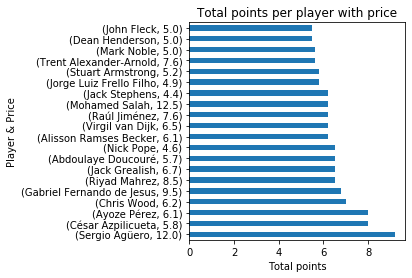

In [39]:
vis_points_price.plot(kind='barh')
plt.title('Total points per player with price')
plt.xlabel('Total points')
plt.ylabel('Player & Price')
plt.gcf().subplots_adjust(left=0.4)
plt.savefig('vis_points_price.png', dpi=100, quality=100)

In [40]:
df.groupby(['name','price'])['total_points'].mean().sort_values(ascending=False).head(30)

name                              price
Kevin De Bruyne                   10.6     159
Jamie Vardy                       9.9      150
Sadio Mané                        12.3     147
Mohamed Salah                     12.5     141
Trent Alexander-Arnold            7.6      134
Marcus Rashford                   8.9      134
Raúl Jiménez                      7.6      129
Tammy Abraham                     7.7      128
Pierre-Emerick Aubameyang         10.7     127
Danny Ings                        7.0      126
Sergio Agüero                     12.0     119
Teemu Pukki                       6.5      117
Virgil van Dijk                   6.5      116
Raheem Sterling                   11.7     115
Andrew Robertson                  7.0      112
Roberto Firmino                   9.6      110
Riyad Mahrez                      8.5      110
James Maddison                    7.6      109
Richarlison de Andrade            8.1      108
John Lundstram                    5.1      107
Jack Grealish       

In [41]:
df['form_weighted_tp'] = df['form']*df['total_points']*(df['event_points']/10)

In [42]:
df.event_points.describe()

count    611.000000
mean       1.315876
std        2.491966
min       -3.000000
25%        0.000000
50%        0.000000
75%        2.000000
max       15.000000
Name: event_points, dtype: float64

In [43]:
df.groupby(['name','price'])['event_points'].mean().sort_values(ascending=False).head(30)

name                              price
Ayoze Pérez                       6.1      15
Florian Lejeune                   4.4      14
Jordan Henderson                  5.4      14
Bamidele Alli                     8.5      13
Nathan Redmond                    6.2      13
Ricardo Domingos Barbosa Pereira  6.3      12
Harvey Barnes                     5.9      12
Chris Wood                        6.2      12
Dean Henderson                    5.0      11
Jack Stephens                     4.4      11
Ben Mee                           5.0      10
Jorge Luiz Frello Filho           4.9      10
Nick Pope                         4.6      10
Aaron Mooy                        4.8      10
Harry Wilson                      5.8       9
Troy Deeney                       6.3       9
Stuart Armstrong                  5.2       9
Moise Kean                        6.4       9
Tyrone Mings                      4.5       9
Nicolás Otamendi                  5.0       9
Mohamed Salah                     12.5  

In [44]:
df.groupby(['name','price'])['form_weighted_tp'].mean().sort_values(ascending=False).head(30)

name                              price
Ayoze Pérez                       6.1      1224.00
Chris Wood                        6.2       806.40
Mohamed Salah                     12.5      699.36
Nick Pope                         4.6       643.50
Raúl Jiménez                      7.6       639.84
Ricardo Domingos Barbosa Pereira  6.3       636.00
Dean Henderson                    5.0       611.05
Bamidele Alli                     8.5       604.50
Kevin De Bruyne                   10.6      556.50
Jordan Henderson                  5.4       495.88
Harvey Barnes                     5.9       480.00
Trent Alexander-Arnold            7.6       450.24
Teemu Pukki                       6.5       449.28
Sergio Agüero                     12.0      437.92
Nathan Redmond                    6.2       435.50
Jorge Luiz Frello Filho           4.9       435.00
César Azpilicueta                 5.8       431.20
Jack Stephens                     4.4       381.92
Roberto Firmino                   9.6     

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611 entries, 0 to 610
Data columns (total 30 columns):
chance_of_playing_next_round    450 non-null float64
chance_of_playing_this_round    444 non-null float64
cost_change_event               611 non-null int64
cost_change_event_fall          611 non-null int64
cost_change_start               611 non-null int64
cost_change_start_fall          611 non-null int64
dreamteam_count                 611 non-null int64
ep_next                         611 non-null object
ep_this                         611 non-null object
event_points                    611 non-null int64
form                            611 non-null float64
in_dreamteam                    611 non-null bool
news                            611 non-null object
news_added                      450 non-null object
price                           611 non-null float64
selected_by_percent             611 non-null float64
team                            611 non-null object
total_points  

In [26]:
df.dreamteam_count.unique()

array([0, 1, 2, 3, 4, 6, 5])

In [27]:
df.groupby(['name','price'])['form_weighted_tp'].mean().sort_values(ascending=False).head(30)

name                              price
Ayoze Pérez                       6.1      1224.00
Chris Wood                        6.2       806.40
Mohamed Salah                     12.5      699.36
Nick Pope                         4.6       643.50
Raúl Jiménez                      7.6       639.84
Ricardo Domingos Barbosa Pereira  6.3       636.00
Dean Henderson                    5.0       611.05
Bamidele Alli                     8.5       604.50
Kevin De Bruyne                   10.6      556.50
Jordan Henderson                  5.4       495.88
Harvey Barnes                     5.9       480.00
Trent Alexander-Arnold            7.6       450.24
Teemu Pukki                       6.5       449.28
Sergio Agüero                     12.0      437.92
Nathan Redmond                    6.2       435.50
Jorge Luiz Frello Filho           4.9       435.00
César Azpilicueta                 5.8       431.20
Jack Stephens                     4.4       381.92
Roberto Firmino                   9.6     

---

### News column to eliminate players who are not playing...

In [28]:
def left_team(text):
    if ('joined' in text.lower()):
        return True
    else:
        return False

df['left_team'] = df.news.map(left_team)
df.left_team.value_counts()

False    539
True      72
Name: left_team, dtype: int64

In [29]:
def injury(text):
    if ('injury' in text.lower()) or ('knock' in text.lower()):
        return True
    else:
        return False

df['injury'] = df.news.map(injury)
df.injury.value_counts()

False    525
True      86
Name: injury, dtype: int64

In [30]:
def illness(text):
    if ('illness' in text.lower()):
        return True
    else:
        return False

df['illness'] = df.news.map(illness)
df.illness.value_counts()

False    609
True       2
Name: illness, dtype: int64

In [31]:
df = df[df['left_team'] == False]

In [32]:
'''df = df[df['illness'] == False]
df = df[df['injury'] == False]'''

"df = df[df['illness'] == False]\ndf = df[df['injury'] == False]"

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 539 entries, 0 to 610
Data columns (total 33 columns):
chance_of_playing_next_round    378 non-null float64
chance_of_playing_this_round    374 non-null float64
cost_change_event               539 non-null int64
cost_change_event_fall          539 non-null int64
cost_change_start               539 non-null int64
cost_change_start_fall          539 non-null int64
dreamteam_count                 539 non-null int64
ep_next                         539 non-null object
ep_this                         539 non-null object
event_points                    539 non-null int64
form                            539 non-null float64
in_dreamteam                    539 non-null bool
news                            539 non-null object
news_added                      378 non-null object
price                           539 non-null float64
selected_by_percent             539 non-null float64
team                            539 non-null object
total_points  

In [34]:
''''df=pd.get_dummies(df, columns=['country','variety'])'''

"'df=pd.get_dummies(df, columns=['country','variety'])"

In [35]:
df.event_points.head

<bound method NDFrame.head of 0      5
1      8
2      0
3      0
4      0
      ..
606    0
607    0
608    0
609    0
610    0
Name: event_points, Length: 539, dtype: int64>